<a href="https://colab.research.google.com/github/lolaprieto/luludelacream/blob/main/IAA_2025_1C_Gu%C3%ADa_02_%C3%A1rboles_de_decisi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción al Aprendizaje Automático

## Aprendizaje Supervisado - Clasificación

En este notebook comenzamos a trabajar en los problemas de **Clasificación**, una de las tareas más importantes dentro del Aprendizaje Automático (dentro, a su vez, de lo que llamamos Aprendizaje Supervisado). Clasificación en Aprendizaje Automático consiste en aprender etiquetas discretas *y* (target) a partir de un conjunto de atributos (features) *X* (que pueden ser uno, dos, o muchos más) tomando como muestra un conjunto de instancias y entrenando un *modelo*. La meta es que ese modelo ya entrenado pueda ser usado con nuevas observaciones de los features para predecir nuevos target.

Vamos a comenzar introduciendo un dataset sintético de dos features y dos clases. Y trataremos de aprender a clasificarlo usando nuestro primer modelo, un Árbol de Decisión. Haremos esto utilizando la librería Scikit-Learn. Como muchas de las librerías del ecosistema de datos, tiene una documentación excelente, muy detallada y con ejemplos de uso. Muchas veces, para aprender a usar alguna herramienta de Scikit-Learn basta con copiar estos ejemplos y empezar a *jugar* con ellos. También contiene introducciones teóricas a muchos de los temas que son claras y concisas.

### 1. Ejemplo demostrativo

#### Conjunto de datos

Para mostrar de forma clara los conceptos, utilizaremos un dataset artificial. Este consiste en dos variables ($x_1$ e $x_2$) que identifican un punto en el plano. Estos puntos pueden pertenecer a dos clases diferentes ($target = 0$ o $1$).

**Ejercicio:** Importar los datos en el archivo `IAA_Guia_2_clasificacion_binaria.csv` a un DataFrame de Pandas y visuliza las primersa filas.

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
df = pd.read_csv("/content/drive/MyDrive/IAA/IAA_Guia_2_clasificacion_binaria.csv")
df.head()

,x1,x2,target
0,-0.422635,-0.932620,1.0
1,-3.036275,0.482545,0.0
2,-0.634106,-0.040808,1.0
3,-0.448945,0.330000,1.0
4,0.293817,0.638174,1.0


**Ejercicio:** graficar los datos usando la función `.plot` de pandas o `.scatter` de Matplotlib. Visualiza las clases pintando los puntos de diferente color.

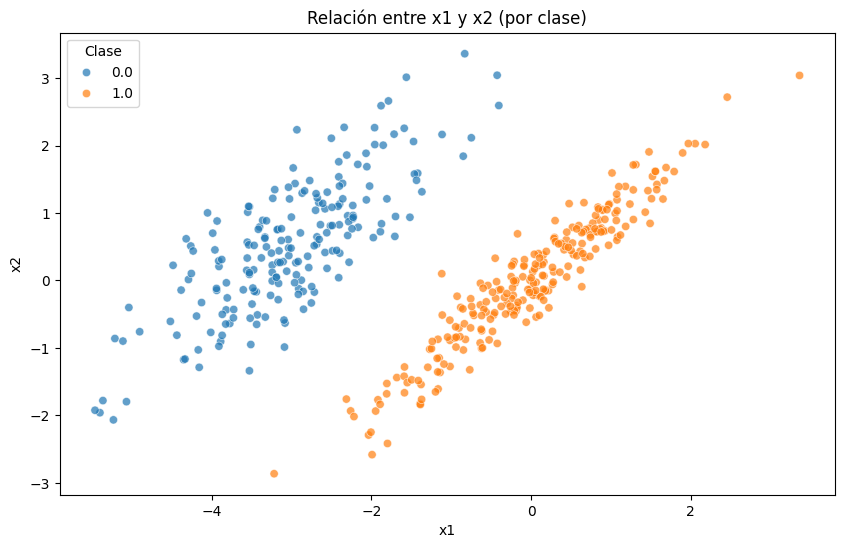

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(aa, x="x1", y="x2", hue="target", alpha=0.7)
plt.title("Relación entre x1 y x2 (por clase)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(title="Clase")
plt.show()

### 2. Primer Acercamiento a la clasificacion: Caso unidimensional.

Imaginemos que queremos clasificar este conjunto de datos en

---

las dos clases provistas, utilizando solo la información de

---

una variable, por ejemplo $x_1$. El acercamiento mas sencillo consistiría en:
- Establecer un valor de _umbral_ $x_u$
- Clasificar segun si $x_1>x_u$

Distintos valores de $x_u$ daran lugar a distintos resultados. Para medir que tan bueno o malo es el resultado, necesitamos de una metrica. Una metrica popular para clasificacion binaria de conjuntos de datos _balanceados_ (es decir, con similar cantidad de instancias en cada clase) es la _exactitud_ o _accuracy_. Esta no es otra cosa que la fracción de instancias bien clasificadas.

**Para pensar:** ¿por qué será importante que los datos estén balancedos?

**Ejercicio:**
1. Grafique un histograma de la coordenada $x_1$ para cada clase.
1. Elija (a ojo) un valor de umbral $x_u$
1. Cree un vector con sus predicciones $pred$, y mida cual es la exactitud de su predicción. Para calcular la exactitud, basta con comparar el vector de predicciones $pred$ con el vector de etiquetas $y$ (*target*) y calcular la fracción de instancias en las que coinciden.
1. Pruebe con distintos valores de umbral, tambien puede probar el mismo procedimiento en el atributos $x_2$. ¿Cual es el mejor _modelo_ que obtiene?

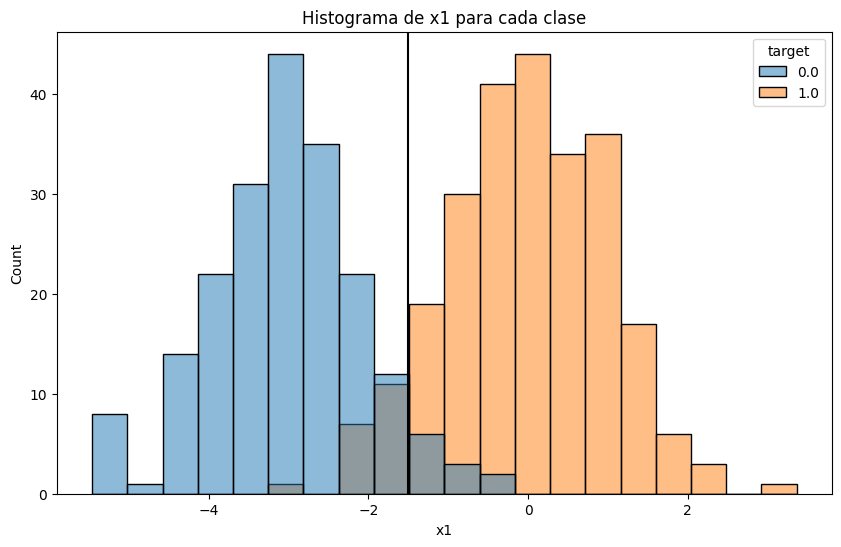

In [72]:
#Grafique un histograma de la coordenada  x1  para cada clase.
plt.figure(figsize=(10, 6))
sns.histplot(df, x="x1", hue="target", bins=20, edgecolor='black')
plt.title(f'Histograma de x1 para cada clase')
plt.xlabel("x1")
plt.axvline(x=-1.5, color="black") #Elija a ojo un valor de umbral de xu
plt.show()


### ESTAS LINEAS PUEDEN SER UTILES
#  ax.vlines(COMPLETAR)
#  plt.axvlines(COMPLETAR)

In [79]:
#predicciones usando el umbral xu
x = df.x1.to_numpy()
x_u = -1.5
pred = np.where(x > x_u, 1, 0)
print(pred)

#Estructura de np.where(condición, valor_si_True, valor_si_False)
#x > x_u: Es la condición. Se evalúa para cada elemento de x.
#Devuelve un array de valores True o False.
#1: Se asigna a los valores de x que cumplen la condición (True).
#0: Se asigna a los valores de x que no cumplen la condición (False).

[1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0
 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0
 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1
 1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1
 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0
 1 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0
 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0
 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0
 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1
 1 0 1 1 0 0]


In [80]:
t = df.target.to_numpy()
acc = np.mean(pred == t)
print(f"Exactitud (umbral = {x_u:.1f} ): {acc*100:.0f}%")

Exactitud (umbral = -1.5 ): 94%


Debajo hay un snippet para visualizar esta clasificación en el gráfico bidimensional. Asegúrate que el vector de predicciones se llama `pred`, el umbral elegido `x_u`, y el DataFrame `df` contenga las columnas originales `x1`, `x2` y `target`.

<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

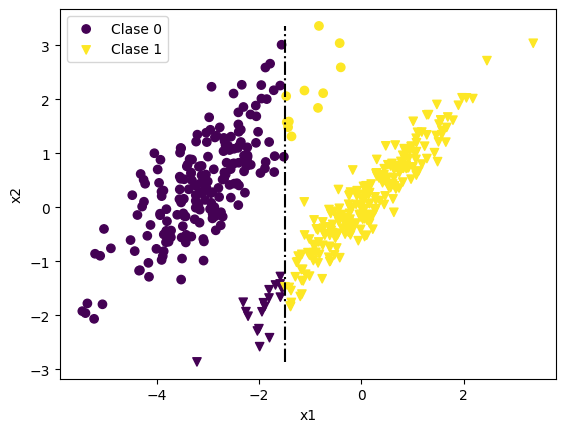

In [81]:
plt.scatter(df[df.target==0].x1, df[df.target==0].x2, marker='o', c=pred[df.target==0], label='Clase 0')
plt.scatter(df[df.target==1].x1, df[df.target==1].x2, marker='v', c=pred[df.target==1], label='Clase 1')
plt.legend()
plt.vlines(x_u,df.x2.min(), df.x2.max(), ls='-.', colors='black')
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend

### 3. Primer modelo: Árbol de decisión

El primer modelo de clasificación que vamos a utilizar es un Árbol de decisión. Por ahora basta que consideres que es un objeto que, dadas varias instancias con un determinados grupo de features **X** y unas determinadas etiquetas objetivo **y**, el árbol de desición aprende **automáticamente** reglas (de mayor a menor importancia) sobre cada feature de manera de poder decidir qué etiqueta le corresponde a cada instancia.

Si queremos entrenar un árbol de decisión para clasificar nuestras instancias, primero debemos crear un objeto correspondiente al modelo. Este objeto será de de la clase `DecisionTreeClassifier`, la cual importamos desde la librería Scikit-Learn. Te recomendamos **fuertemente** que te vayas familiarizando con su documentación, no importa si por ahora no entiendes todo.

In [82]:
from sklearn.tree import DecisionTreeClassifier

# Creamos un objeto arbol
clf = DecisionTreeClassifier(max_depth=3, random_state = 42)

Hasta ahora, lo único que hicimos fue crear el objeto, nada más.

Una vez que nuestro modelo fue creado, precisamos entrenarlo sobre nuestros datos. Esto lo logramos con el método `fit(...)` que poseen **todas** las clases correspondientes a modelos de Scikit-Learn. El método `fit(...)` necesita los atributos `X` y los target `y`.

Las versiones nuevas de Scikit-Learn trabajan tanto con arreglos de NumPy como con DataFrames.

In [83]:
X = df.drop('target', axis=1)
y = df['target']
clf.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

**¿Qué ocurrió?**

El modelo ya está entrenado. Esto significa que contamos con una herramienta que, dadas ciertas características de una instancia - pares (*x1* y *x2*) - nos devuelve qué etiqueta *y* el modelo cree que le corresponde. Esto lo podemos hacer utilizando el método `predict(...)`, que también poseen **todas** las clases correspondientes a modelos de Scikit-Learn. Veamos algunos ejemplos:

1. Inventando instancias

In [84]:
### Inventamos una instancia

instancia = np.array([-3,1]) # el primer valor corresponde a x1 y el segundo x2
instancia = instancia.reshape(1,-1) # No te preocupes por ahora por el reshape. Es un requisito que quedará más claro después
y_pred = clf.predict(instancia) # Hacemos la predicciṕn
print(y_pred) # imprimimos en pantalla la predicción

[0.]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


¿Estás de acuerdo con la etiqueta asignada? Mirá en el gráfico del set de entrenamiento si estás de acuerdo con la etiqueta que nos devolvió.

2. Tomando instancias del set de entrenamiento.

In [ ]:
### Tomamos las instancias al azar
# np.random.seed(3) # si quieres que sea al azar, cambia la semilla o comenta esta linea.
n = 318
idxs = np.random.randint(len(X), size=3)
instancias = X.iloc[idxs]
print(instancias)

In [ ]:
### Predecimos
y_pred = clf.predict(instancias)
print(y_pred)

### Comparamos la etiqueta real con la predicha:
for i, idx in enumerate(idxs):
    print(f'Instancia {idx}. Etiqueta real: {y[idx]}. Etiqueta predicha: {y_pred[i]}')

Ejecuta varias veces las celdas anteriores. ¿El modelo acierta siempre? Selecciona alguna instancia cuya etiqueta no funcione y observa sus valores. ¿Por qué crees que falla? Por ejemplo, la instancia 318 está mal clasificada.

In [ ]:
k = 8
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=25, cmap='bwr', alpha = 0.5)
plt.scatter(X.iloc[k, 0], X.iloc[k, 1], c = 'k', s=200, cmap='bwr', marker = '*')
plt.xlabel('Atributo 1 - x1')
plt.ylabel('Atributo 2 - x2')
plt.show()

Volvamos sobre un aspecto del clasificador: dadas características *x1* y *x2* de una instancia, nos dice qué etiqueta *y* (0: azul, 1: rojo) le corresponde. Podemos pensar que el clasificador *pinta* el plano *x1*,*x2* de acuerdo al color que cree que corresponde. Si hay regiones azules y regiones rojas, debe existir una frontera donde el color cambie. Tratemos de visualizarla.

La función que definimos en la siguiente celda nos permite explorar cómo es el dominio de decisión de nuestro arbol una vez que lo entrenamos.

In [ ]:
# Función que nos ayuda a graficar
# No hace falta que comprandan este bloque de código.
def visualize_classifier(model, X, y, ax=None, proba = False):
    if isinstance(X, pd.DataFrame):
        X = X.values
    if isinstance(y, pd.Series):
        y = y.values
    ax = ax or plt.gca()

    colors_tab10 = plt.cm.tab10.colors

    for i, y_value in enumerate(reversed(np.unique(y))):
        ax.scatter(X[y==y_value, 0], X[y==y_value, 1], s=30,
                   zorder=3, alpha = 0.5, color = colors_tab10[i])

    ax.axis('tight')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    # ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))

    if proba:
        Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1].reshape(xx.shape)
    else:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)


    # Create a color plot with the results
    Z = -Z + 1
    ax.pcolormesh(xx,yy,Z,cmap='bwr', vmin = 0, vmax=1, alpha = 0.2)

    ax.set(xlim=xlim, ylim=ylim)


In [ ]:
fig, axs=  plt.subplots(1,1, figsize = (7,5))
visualize_classifier(clf, X, y, ax = axs)
axs.set_xlabel('Atributo 1 - x1')
axs.set_ylabel('Atributo 2 - x2')
plt.show()

En este gráfico aquellos puntos (instancias) que queden sobre un fondo de su mismo color son aquellos que están bien clasificados por el modelo. Esto quiere decir que que si usamos el modelo para calificar su etiqueta *y* a partir de sus coordenadas *x1* y *x2*, éste nos daría la misma etiqueta original del punto. En cambio, aquellos puntos que queda sobre un fondo de otro color son puntos para los cuales el modelo nos estaría dando una etiqueta distinta a la etiqueta original de esa instancia.

Nos podríamos preguntar luego: ¿cuál es el porcentaje de instancias bien clasificadas por el modelo? Para responder esto usaremos nuevamente el método `predict` sobre todo el dataset `X`. Luego con la función `accuracy_score` podemos calcular el porcentaje de aciertos que obtenemos al comparar nuestra predicción `y_pred` contra la clase original `y`. Recomendamos mirar la documentación de esta función. ¿Cómo dio con respecto a la exactitud que habías calculado antes?¿Qué diferencias encuentras entre el modelo del caso unidimensional y éste?

In [ ]:
from sklearn.metrics import accuracy_score

# Predecimos sobre nuestro set de entrenamieto
y_pred = clf.predict(X)

# Comaparamos con las etiquetas reales
accuracy_score(y_pred,y)

**Ejercicio:** visualizar el árbol obtenido con la función `plot_tree()` del módulo `tree` de Scikit-Learn. ¿Qué conclusiones puede sacar de la visualización?¿Cómo se relaciona con el caso unidimensional?

In [ ]:
# COMPLETAR

**Ejercicio:** modificar el parámetro `max_depth` del árbol de decisión y observar cómo se modifican las fronteras de decisión y el `accuracy_score`. Primero hazlo de manera manual, y luego de manera programática con un for-loop.

In [ ]:
# COMPLETAR

## Más ejercicios


**Ejercicio - Para pensar y probar**:
1. Hay algunas características de esta formulación que tal vez te llamen la atención. En el caso binario, un problema de clasificación consiste en encontrar una **frontera** entre puntos que deje a un lado los que pertenecen a una clase, y del otro lado los puntos de la otra clase. Para convencerse (¡o no!):

1. Elegir un problema de Clasificación Binario (al estilo Spam/No-Spam, Titanic Sobrevivió/No-Sobrevivió, etc.). Inventar - a mano - dos atributos, algunas instancias, y graficar. Luego, dibujar una frontera de decisión (siempre a mano, no tienen que programar). Un ejemplo podría ser: para clasificar vinos blancos y vinos tintos, un atributo podría ser el color y el otro podría ser el dulzor. Para el mismo problema, dibuja un árbol de decisión y visualiza la frontera de decisión de ese árbol. ¿Se parece a la frontera que dibujaste al comienzo?¿Qué características tienen las fronteras obtenidas con árboles de decisión?

1. ¿Qué ocurre si en lugar de dos atributos tenemos tres?¿Qué forma tendrá la frontera? Y si en vez de tres atributos tenemos cuatro?¿Se podrá visualizar?

1. **Extra:** googlea qué es la maldición de la dimensión/dimensionalidad (curse of dimensionality).
    


**Ejercicio - Pingüinos:**
La tarea que vamos a realizar es la siguiente: queremos clasificar pingüinos según su sexo (macho y hembra). Para ello:

1. Cargue el conjunto de datos.

1. Selecciona un atributo y el target. ¿Cuál atributo elegirías? ¿Por qué? Estima un umbral a mano como hicimos en la primera parte, clasifica y visualiza.

1. Selecciona ahora dos atributos y utiliza un modelo de árboles de decisión. Calcula la exactitud obtenida y visualiza la frontera de decisión. También, visualiza el árbol obtenido (`plot_tree`). ¿Qué resultados obtienes? ¿Qué atributos elegiste?¿Por qué?¿Dónde falla?¿Hay algo que se pueda hacer al respecto?

1. Prueba con todos los atributos que quieras. Calcula la exactitud obtenida y, si creés que se puede, visualiza la frontera de decisión.

**Ejercicio - Cálculo de impureza:**
1. Calcula la impureza inicial del dataset de pingüinos, considerando el target *sexo*.
1. Calcula la ganancia Gini luego de separar por el atributo `body_mass_g` en un valor de 4200. ¿Qué ganancia resulta?¿Y si separas en 4000?¿Y si separas en 4300?¿Cuál es la mejor separación?¿Concuerda con lo visto hasta ahora? Recuerden que tienen que calcular la impureza en dos hojas - una correspondiente al caso *mayor* y otra al *menor* - y luego hacer un promedio ponderado.

**Ejercicio - Muy importante - Dataset TP final:** Aplica lo visto hoy al dataset que utilizaron para el TP final. ¿Qué resultados obtienes?¿Qué atributos elegiste?¿Por qué?¿Dónde falla?¿Hay algo que se pueda hacer al respecto?
